In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Importing Super Store data

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Overview of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Checking null *values*

In [ ]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Replacing null value with **zeros**

In [ ]:
df['Postal Code'].fillna(0,inplace=True)

In [ ]:
df['Postal Code'].astype(int)

0       42420
1       42420
2       90036
3       33311
4       33311
        ...  
9795    60610
9796    43615
9797    43615
9798    43615
9799    43615
Name: Postal Code, Length: 9800, dtype: int64

# Data Description

In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


Deletion of duplicate values

In [ ]:
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# Data Analysis

# **Different segment of customers**

Mainly here there are 3 different types of customers

1) Consumer

2) Corporate

3) Home Office

In [ ]:
 segment = df['Segment'].value_counts()
 segment

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [ ]:
typ_cust = df['Segment'].unique()
typ_cust

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

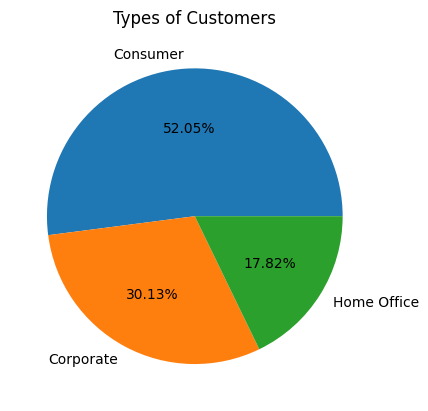

In [ ]:
plt.pie(segment,labels=typ_cust,autopct='%1.2f%%')
plt.title('Types of Customers')
plt.show()

# Sales per Different Customer

Maximum no.of sales comes with **Consumers** followed by **Corporate**

In [ ]:
sales = df.groupby('Segment')['Sales'].sum()
sales

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

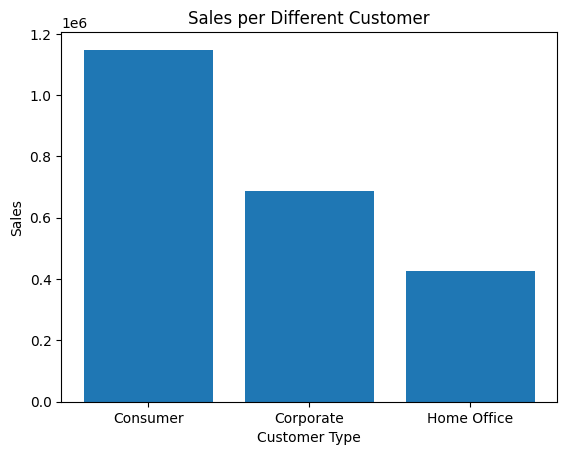

In [ ]:
plt.bar(typ_cust,sales)
plt.title('Sales per Different Customer')
plt.xlabel('Customer Type')
plt.ylabel('Sales')

plt.show()

# Sales Analysis

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Category sales

In [ ]:
category = df['Category'].value_counts()
category

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [ ]:
category_ind = df['Category'].unique()
category

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

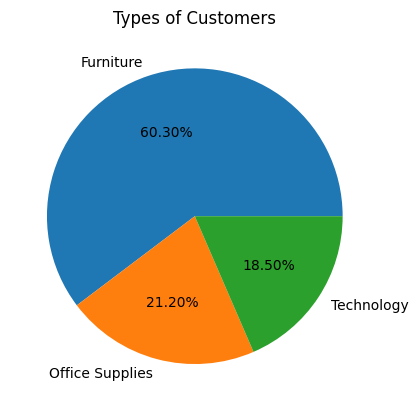

In [ ]:
plt.pie(category,labels=category_ind,autopct='%1.2f%%')
plt.title('Types of Customers')

plt.show()

In [ ]:
sales_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_category

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


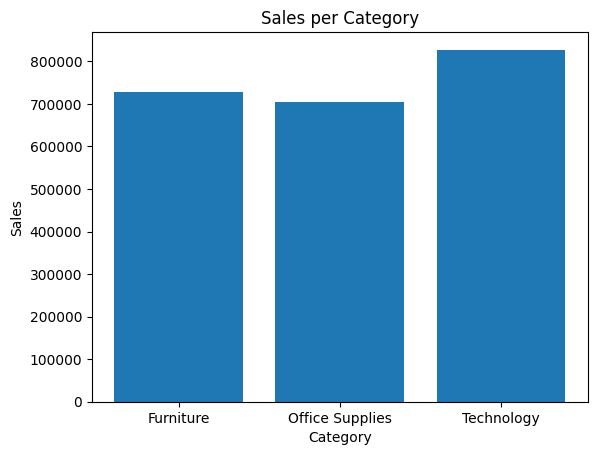

In [ ]:
plt.bar(category_ind,sales_category['Sales'])
plt.title('Sales per Category')
plt.xlabel('Category')
plt.ylabel('Sales')

plt.show()

Sub category sales

In [ ]:
category_counts = df['Category'].value_counts()

In [ ]:
sub = df.groupby('Category')['Sub-Category'].value_counts()
sub

Category         Sub-Category
Furniture        Furnishings      931
                 Chairs           607
                 Tables           314
                 Bookcases        226
Office Supplies  Binders         1492
                 Paper           1338
                 Storage          832
                 Art              785
                 Appliances       459
                 Labels           357
                 Envelopes        248
                 Fasteners        214
                 Supplies         184
Technology       Phones           876
                 Accessories      756
                 Machines         115
                 Copiers           66
Name: count, dtype: int64

In [ ]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sub_category_sales = sub_category_sales.sort_values(by='Sales', ascending=False)
sub_category_sales

,Sub-Category,Sales
13,Phones,327782.4480
5,Chairs,322822.7310
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


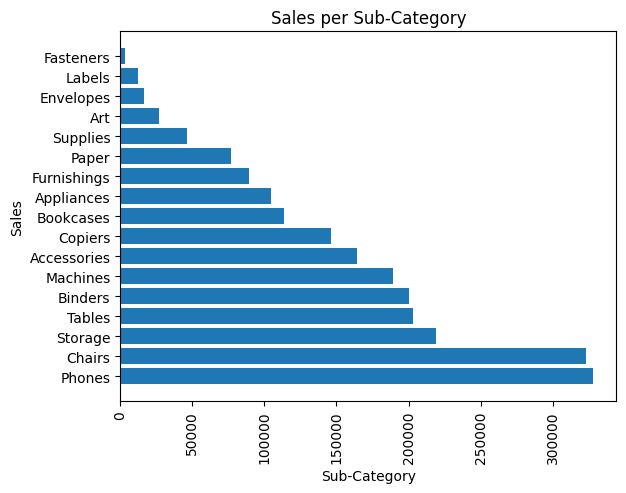

In [ ]:
plt.barh(sub_category_sales['Sub-Category'], sub_category_sales['Sales'])
plt.title('Sales per Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

**Region Wise sales**

In [ ]:
region = df.groupby('Region')['Sales'].sum().reset_index()
region

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


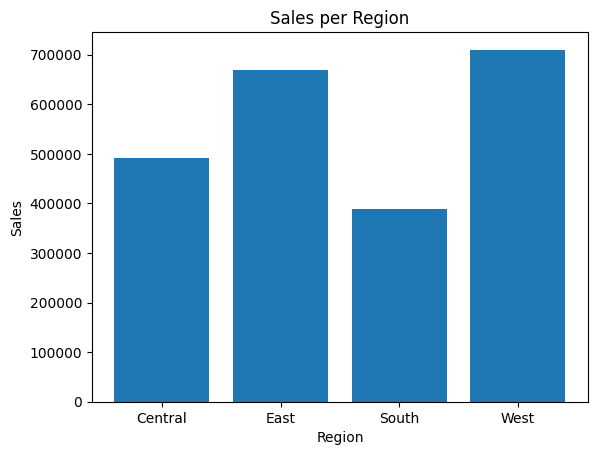

In [ ]:
plt.bar(region['Region'],region['Sales'])
plt.title('Sales per Region')
plt.xlabel('Region')
plt.ylabel('Sales')

plt.show()

**State Wise Sales**

In [ ]:
state = df.groupby('State')['Sales'].sum().reset_index()
state

,State,Sales
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11678.1300
3,California,446306.4635
4,Colorado,31841.5980
5,Connecticut,13384.3570
6,Delaware,27322.9990
7,District of Columbia,2865.0200
8,Florida,88436.5320
9,Georgia,48219.1100


Top 5 sales states

In [ ]:
state = df.groupby('State')['Sales'].sum().reset_index()
state = state.sort_values(by='Sales',ascending=False).head()[:5]
state

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500


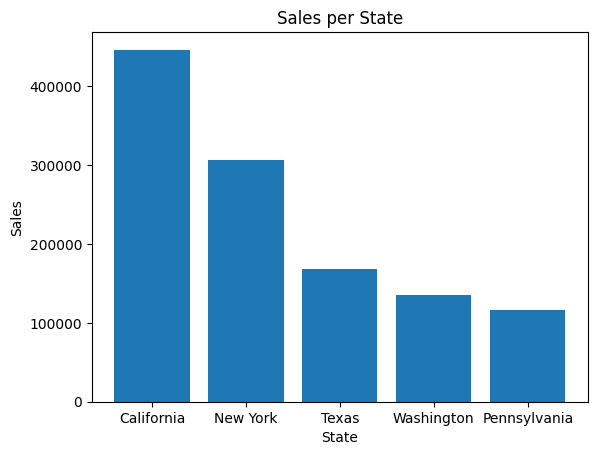

In [ ]:
plt.bar(state['State'],state['Sales'])
plt.title('Sales per State')
plt.xlabel('State')
plt.ylabel('Sales')

plt.show()

# City wise sales analysis

In [ ]:
city_wise = df.groupby('City')['Sales'].sum().reset_index()
city_wise

,City,Sales
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2724.244
3,Albuquerque,2220.160
4,Alexandria,5519.570
...,...,...
524,Woonsocket,195.550
525,Yonkers,7657.666
526,York,817.978
527,Yucaipa,50.800


In [ ]:
city_wise = city_wise.sort_values(by='Sales',ascending=False).head()[:5]
city_wise

,City,Sales
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322
436,San Francisco,109041.120
372,Philadelphia,108841.749


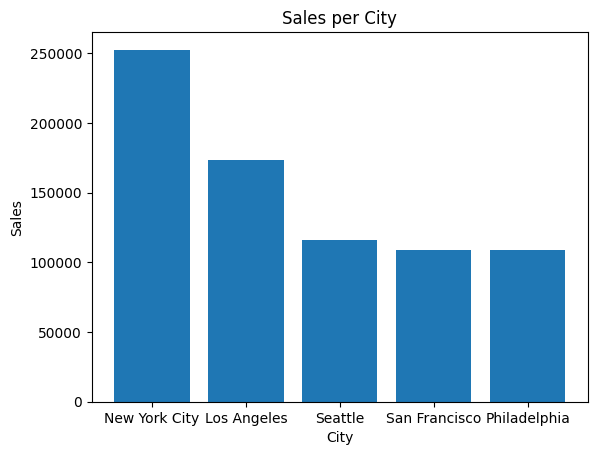

In [ ]:
plt.bar(city_wise['City'],city_wise['Sales'])
plt.title('Sales per City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

# Repeated Customers

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
rept = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count()
rept = rept.reset_index()
rept = rept.rename(columns={'Order ID':'Count_of_orders'})
rept


,Customer ID,Customer Name,Segment,Count_of_orders
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [ ]:
rept = rept[rept['Count_of_orders']>1]
sorted_rept = rept.sort_values(by='Count_of_orders',ascending=False)
sorted_rept

,Customer ID,Customer Name,Segment,Count_of_orders
787,WB-21850,William Brown,Consumer,35
606,PP-18955,Paul Prost,Home Office,34
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,33
720,SV-20365,Seth Vernon,Consumer,32
...,...,...,...,...
650,RM-19750,Roland Murray,Consumer,2
593,PH-18790,Patricia Hirasaki,Home Office,2
49,AR-10570,Anemone Ratner,Consumer,2
552,NB-18580,Nicole Brennan,Corporate,2


In [ ]:
customer_sales = df.groupby(['Customer ID','Customer Name'])['Sales'].sum().reset_index()
customer_sales

,Customer ID,Customer Name,Sales
0,AA-10315,Alex Avila,5563.560
1,AA-10375,Allen Armold,1056.390
2,AA-10480,Andrew Allen,1790.512
3,AA-10645,Anna Andreadi,5086.935
4,AB-10015,Aaron Bergman,886.156
...,...,...,...
788,XP-21865,Xylona Preis,2374.658
789,YC-21895,Yoseph Carroll,5454.350
790,YS-21880,Yana Sorensen,6720.444
791,ZC-21910,Zuschuss Carroll,8025.707


In [ ]:
sorted_customer_sales = customer_sales.sort_values(by='Sales',ascending=False)[:10]
sorted_customer_sales

,Customer ID,Customer Name,Sales
700,SM-20320,Sean Miller,25043.050
741,TC-20980,Tamara Chand,19052.218
621,RB-19360,Raymond Buch,15117.339
730,TA-21385,Tom Ashbrook,14595.620
6,AB-10105,Adrian Barton,14473.571
434,KL-16645,Ken Lonsdale,14175.229
669,SC-20095,Sanjit Chand,14142.334
327,HL-15040,Hunter Lopez,12873.298
683,SE-20110,Sanjit Engle,12209.438
131,CC-12370,Christopher Conant,12129.072


# Year wise sales



In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

df['year'] = df['Ship Date'].dt.year
year_wise = df.groupby('year')['Sales'].sum().reset_index()
year_wise

,year,Sales
0,2015,467041.8731
1,2016,467302.3884
2,2017,602306.3450
3,2018,719726.4794
4,2019,5159.6968


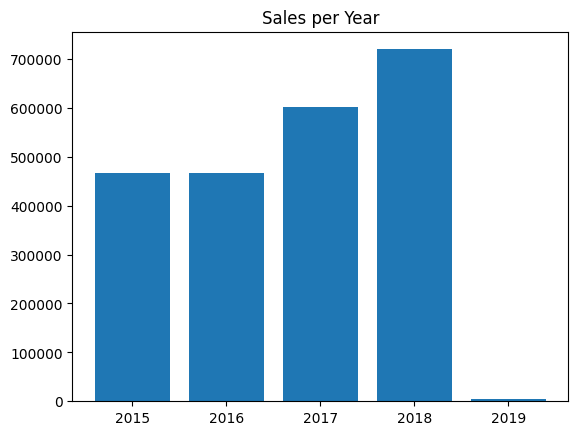

In [ ]:
plt.bar(year_wise['year'],year_wise['Sales'])
plt.title('Sales per Year')
plt.show()

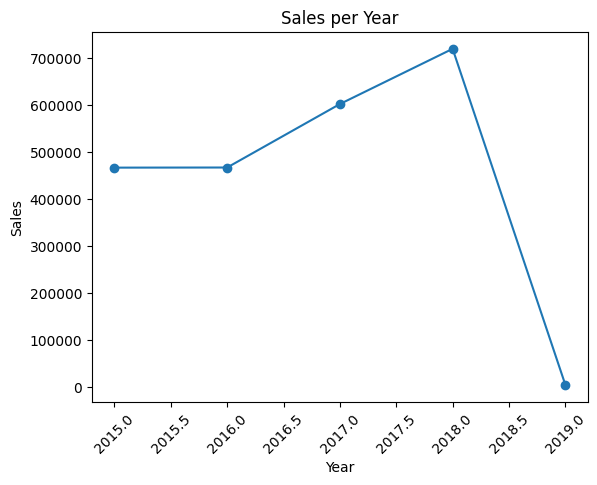

In [ ]:
plt.plot(year_wise['year'],year_wise['Sales'],'o-')

plt.xticks(rotation=45)
plt.title('Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.show()

In [ ]:
df.head

<bound method NDFrame.head of       Row ID        Order ID  Order Date  Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017 2017-11-11    Second Class   
1          2  CA-2017-152156  08/11/2017 2017-11-11    Second Class   
2          3  CA-2017-138688  12/06/2017 2017-06-16    Second Class   
3          4  US-2016-108966  11/10/2016 2016-10-18  Standard Class   
4          5  US-2016-108966  11/10/2016 2016-10-18  Standard Class   
...      ...             ...         ...        ...             ...   
9795    9796  CA-2017-125920  21/05/2017 2017-05-28  Standard Class   
9796    9797  CA-2016-128608  12/01/2016 2016-01-17  Standard Class   
9797    9798  CA-2016-128608  12/01/2016 2016-01-17  Standard Class   
9798    9799  CA-2016-128608  12/01/2016 2016-01-17  Standard Class   
9799    9800  CA-2016-128608  12/01/2016 2016-01-17  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name  \
0       Bookcases                  Bush Somerset Collection Bookcase   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2          Labels  Self-Adhesive Address Labels for Typewriters b...   
3          Tables      Bretford CR4500 Series Slim Rectangular Table   
4         Storage                     Eldon Fold 'N Roll Cart System   
...           ...                                                ...   
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...   
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   
9797       Phones                                        GE 30524EE4   
9798       Phones           Anker 24W Portable Micro USB Car Charger   
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   

         Sales  year  
0     261.9600  2017  
1     731.9400  2017  
2      14.6200  2017  
3     957.5775  2016  
4      22.3680  2016  
...        ...   ...  
9795    3.7980  2017  
9796   10.3680  2016  
9797  235.1880  2016  
9798   26.3760  2016  
9799   10.3840  2016  

[9800 rows x 19 columns]>

#Shipping mode analysis

In [ ]:
ship = df['Ship Mode'].value_counts()
ship

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [ ]:
ship_index = df['Ship Mode'].unique()
ship_index

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

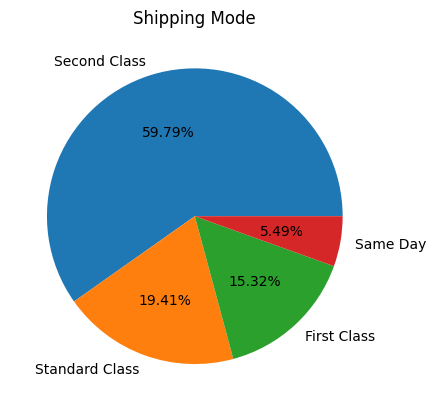

In [ ]:
plt.pie(ship,labels=ship_index,autopct='%1.2f%%')
plt.title('Shipping Mode')
plt.show()

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year
0,1,CA-2017-152156,08/11/2017,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,08/11/2017,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,12/06/2017,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,11/10/2016,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,11/10/2016,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016


In [ ]:
df['year'].value_counts()

year
2018    3249
2017    2524
2016    2083
2015    1902
2019      42
Name: count, dtype: int64